# Подготовка среды и датасетов

In [17]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [18]:
plt.rcParams['figure.figsize'] = 12, 8

In [19]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

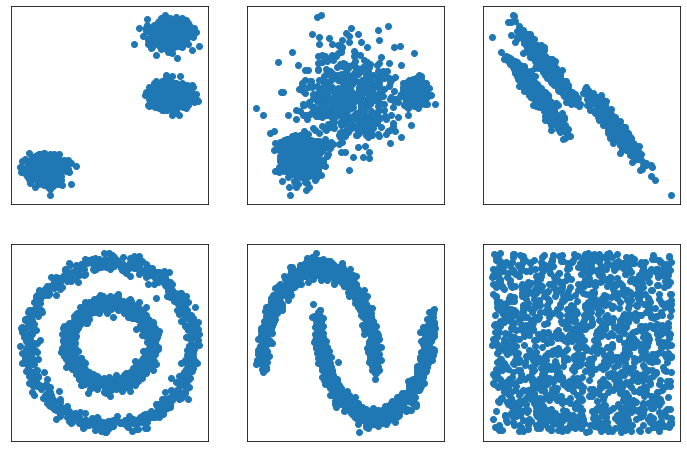

In [20]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(int(f'23{i}'))
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

       
    

# KMeans

Интерактивная визуализация работы KMeans – https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Для примера из видео: **Random** $\rightarrow$ **Packed Circles**

![KMeans](https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif "KMeans")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [21]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


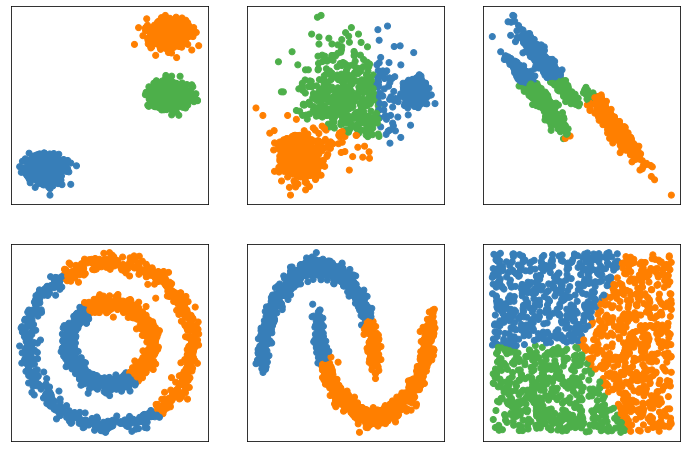

In [22]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(int)

    plt.subplot(int(f'23{i}'))
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

# EM-алгоритм

![EM-алгоритм](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif "EM-алгоритм")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [23]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

In [24]:
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters'])
    
    em_gm.fit(X)
    y_pred = em_gm.predict(X)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

ValueError: Single argument to subplot must be a three-digit integer, not '231'

<Figure size 864x576 with 0 Axes>

# Агломеративная кластеризация

![AG](https://media.giphy.com/media/pSNCWCEAsgrAs/giphy.gif "Агломеративная кластеризация")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                                   # “cosine”, or “precomputed”
                             linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

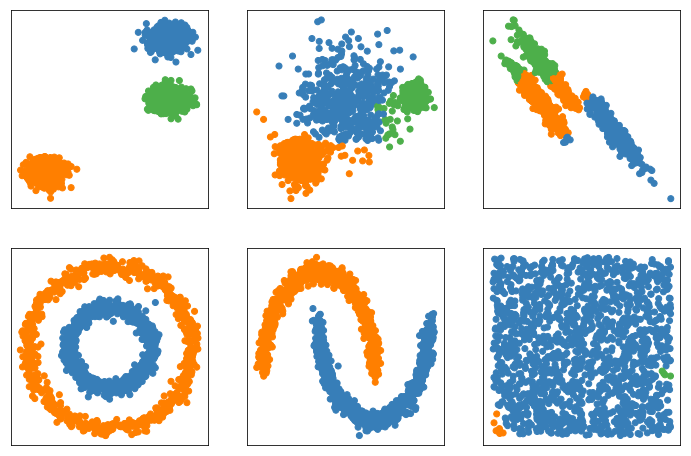

In [ ]:
import warnings

from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

# DBSCAN

Интерактивная визуализация работы DBSCAN – https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Для примера из видео: **Pimpled Smiley**

![DBSCAN](https://media0.giphy.com/media/lCL2GQewp7fkk/giphy.gif "DBSCAN")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,
                min_samples=5)

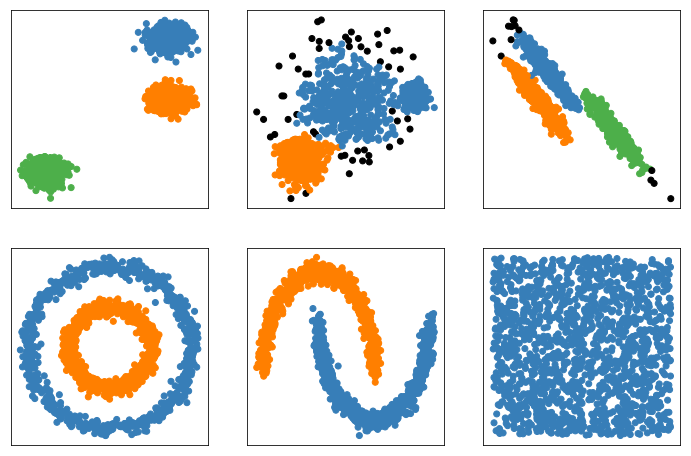

In [ ]:
datasets_params_list = [
    (blobs, {'eps': 0.3}),
    (varied, {'eps': 0.18}),
    (aniso, {'eps': 0.184}),
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (no_structure, {'eps': 0.3})]

for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    dbscan = DBSCAN(eps=dbscan_params['eps'])
    
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

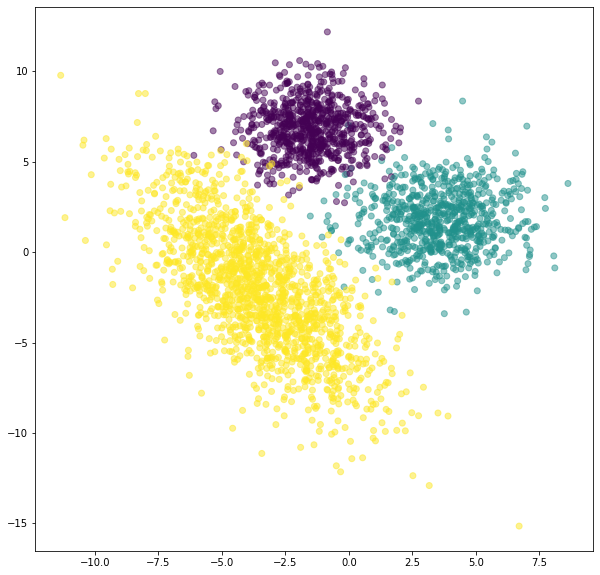

In [29]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [30]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=42)

In [ ]:
k_means.fit(X)
a = k_means.cluster_centers_
print(np.round(a).astype(int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


d:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
b = k_means.labels_
_, counts = np.unique(b, return_counts=True)
for count in counts:
    print(count, end=' ')

1320 938 742 

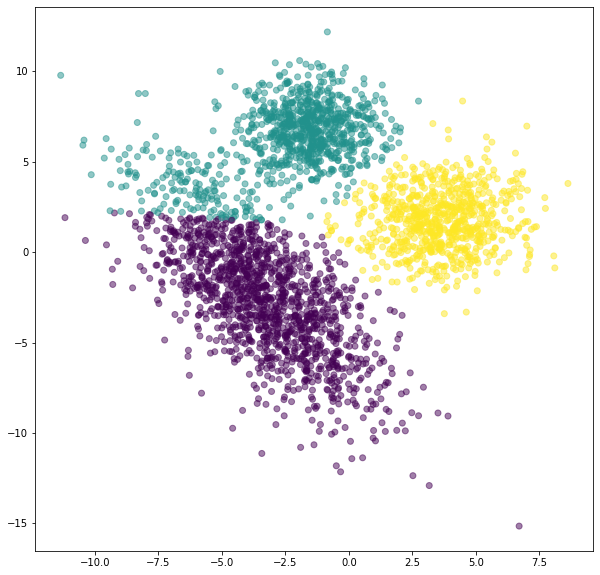

In [ ]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)

In [ ]:
gm.fit(X)
y_pred = gm.fit_predict(X)
means = gm.means_

In [ ]:
print(np.round(means).astype(int))

[[ 4  2]
 [-2  7]
 [-4 -2]]


In [ ]:
a = y_pred
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

744 763 1493 

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)

In [ ]:
ac.fit(X)
ac.n_leaves_

3000

In [ ]:
a = ac.labels_
counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

[0 1 2] [1112 1142  746] 

In [ ]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)

In [ ]:
ac.fit(X)
a = ac.labels_
counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

[0 1 2] [1486  746  768] 

Задание 4.7.5
0.0/2.0 points (graded)
Постройте дендрограмму с помощью пакета scipy

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [102.5, 102.5, 137.5, 137.5],
  [80.0, 80.0, 120.0, 120.0],
  [50.0, 50.0, 100.0, 100.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [210.0, 210.0, 241.25, 241.25],
  [182.5, 182.5, 225.625, 225.625],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [395.0, 395.0, 405.0, 

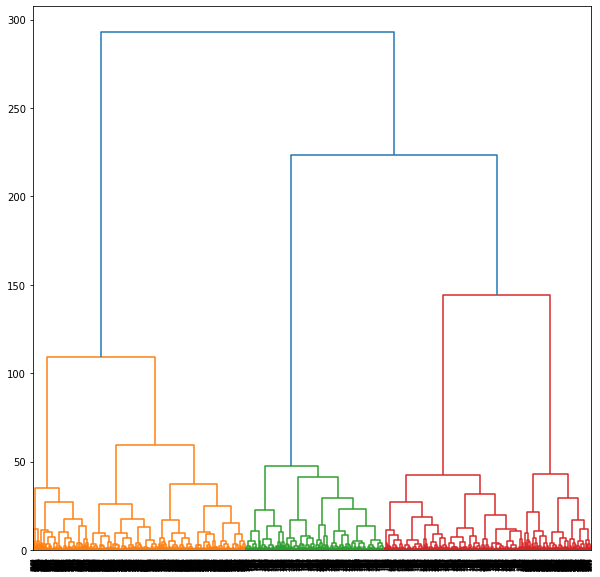

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
dendrogram(Z, leaf_rotation=90.)

Сколько получится кластеров, если граничным расстоянием для разделения кластеров взять 150

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=None, distance_threshold=100)

In [ ]:
ac.fit(X)
ac.n_clusters_

5

In [31]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=35)

Задание 4.8.3

In [34]:
counts = np.unique(dbscan.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

[-1  0  1  2] [ 583  603  681 1133] 

Задание 4.8.4

In [35]:
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
counts = np.unique(dbscan.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

[-1  0  1  2] [ 368  656  721 1255] 